### Import statements

Since Great Expectations is listed in the requirements.txt file, Deepnote will install it when the hardware starts. Read more about package installation here.

In [1]:
# CS 6603 Final Group project: Mark P Abbott - mabbott7, Michael Countouris - mcountouris3, Soon Ryu - sryu71
# 기본 데이터 처리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
 
print("pandas:", pd.__version__)
print("numpy:", np.__version__)



pandas: 2.3.3
numpy: 2.3.4


In [2]:
# STEP 1: Dataset Analysis
# Run this after your import cell

# Load the dataset (adjust path if needed)
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

print("="*60)
print("STEP 1: DATASET ANALYSIS RESULTS")
print("="*60)

# Answer to Question 1: Dataset selected
print("\n1. DATASET SELECTED: Employee Attrition")
print("   Name: WA_Fn-UseC_-HR-Employee-Attrition.csv")
print("   Link: https://www.kaggle.com/datasets/patelprashant/employee-attrition")

# Answer to Question 2: Regulated domain
print("\n2. REGULATED DOMAIN:")
print("   Employment (HR/Human Resources)")

# Answer to Question 3: Number of observations
print(f"\n3. NUMBER OF OBSERVATIONS:")
print(f"   {len(df)} observations")

# Answer to Question 4: Number of variables
print(f"\n4. NUMBER OF VARIABLES:")
print(f"   {len(df.columns)} variables")

# Answer to Question 5: Dependent/outcome variables
print(f"\n5. DEPENDENT/OUTCOME VARIABLES:")
print("   - Attrition (Primary): Employee turnover (Yes/No)")
print(f"     Values: {list(df['Attrition'].unique())}")

attrition_counts = df['Attrition'].value_counts()
total = len(df)
no_pct = (attrition_counts['No'] / total) * 100
yes_pct = (attrition_counts['Yes'] / total) * 100
print(f"     Distribution: No: {attrition_counts['No']} ({no_pct:.1f}%), Yes: {attrition_counts['Yes']} ({yes_pct:.1f}%)")

print()
print("   - PerformanceRating (Secondary): Performance score")
print(f"     Values: {list(df['PerformanceRating'].unique())}")

perf_counts = df['PerformanceRating'].value_counts()
rating3_pct = (perf_counts[3] / total) * 100
rating4_pct = (perf_counts[4] / total) * 100
print(f"     Distribution: Rating 3: {perf_counts[3]} ({rating3_pct:.1f}%), Rating 4: {perf_counts[4]} ({rating4_pct:.1f}%)")

# Answer to Question 6: Protected class variables
print(f"\n6. PROTECTED CLASS VARIABLES:")
print(f"   Total: 3 protected class variables")
print()
print("   - Age (Continuous)")
print(f"     Range: {df['Age'].min()} to {df['Age'].max()} years")
print()
print("   - Gender (Categorical)")
print(f"     Values: {list(df['Gender'].unique())}")

gender_counts = df['Gender'].value_counts()
male_pct = (gender_counts['Male'] / total) * 100
female_pct = (gender_counts['Female'] / total) * 100
print(f"     Distribution: Male: {gender_counts['Male']} ({male_pct:.1f}%), Female: {gender_counts['Female']} ({female_pct:.1f}%)")

print()
print("   - MaritalStatus (Categorical)")
print(f"     Values: {list(df['MaritalStatus'].unique())}")

marital_counts = df['MaritalStatus'].value_counts()
married_pct = (marital_counts['Married'] / total) * 100
single_pct = (marital_counts['Single'] / total) * 100
divorced_pct = (marital_counts['Divorced'] / total) * 100
print(f"     Distribution: Married: {marital_counts['Married']} ({married_pct:.1f}%), Single: {marital_counts['Single']} ({single_pct:.1f}%), Divorced: {marital_counts['Divorced']} ({divorced_pct:.1f}%)")

# Answer to Question 7: Legal precedence/law
print(f"\n7. LEGAL PRECEDENCE FOR EACH PROTECTED CLASS:")
print("   - Age: Age Discrimination in Employment Act (ADEA)")
print("         Protects workers 40+ years old")
print()
print("   - Gender: Title VII of Civil Rights Act of 1964")
print("           Prohibits employment discrimination based on sex")
print()
print("   - MaritalStatus: Fair Employment and Housing Act")
print("                  Prohibits discrimination based on marital status")

# Requirements check
print(f"\n8. PROJECT REQUIREMENTS CHECK:")
print(f"   ✓ At least 500 observations? YES ({len(df)} observations)")
print(f"   ✓ At least 2 protected classes? YES (3 classes)")
print(f"   ✓ At least 2 dependent variables? YES (2 variables)")
print(f"   ✓ Related to regulated domain? YES (Employment)")

print(f"\n9. DATA QUALITY CHECK:")
missing_count = df.isnull().sum().sum()
if missing_count == 0:
    print("   ✓ No missing values found!")
else:
    print(f"   ⚠ {missing_count} missing values found")

STEP 1: DATASET ANALYSIS RESULTS

1. DATASET SELECTED: Employee Attrition
   Name: WA_Fn-UseC_-HR-Employee-Attrition.csv
   Link: https://www.kaggle.com/datasets/patelprashant/employee-attrition

2. REGULATED DOMAIN:
   Employment (HR/Human Resources)

3. NUMBER OF OBSERVATIONS:
   1470 observations

4. NUMBER OF VARIABLES:
   35 variables

5. DEPENDENT/OUTCOME VARIABLES:
   - Attrition (Primary): Employee turnover (Yes/No)
     Values: ['Yes', 'No']
     Distribution: No: 1233 (83.9%), Yes: 237 (16.1%)

   - PerformanceRating (Secondary): Performance score
     Values: [np.int64(3), np.int64(4)]
     Distribution: Rating 3: 1244 (84.6%), Rating 4: 226 (15.4%)

6. PROTECTED CLASS VARIABLES:
   Total: 3 protected class variables

   - Age (Continuous)
     Range: 18 to 60 years

   - Gender (Categorical)
     Values: ['Female', 'Male']
     Distribution: Male: 882 (60.0%), Female: 588 (40.0%)

   - MaritalStatus (Categorical)
     Values: ['Single', 'Married', 'Divorced']
     Distribut

In [3]:
# Install AIF360 confirmation
try:
    import aif360
    print("✅ AIF360 successfully installed!")
    print("Version:", aif360.__version__)
except ImportError as e:
    print("❌ AIF360 installation failed:", e)

✅ AIF360 successfully installed!
Version: 0.6.1


In [6]:
# Step 2: Dataset exploration

# 2.1 Protected class subgroups
print("=== STEP 2.1: Protected Class Subgroups ===")
print("Age groups:", df['Age'].unique()[:10], "... (continuous)")
print("Gender:", df['Gender'].unique())
print("MaritalStatus:", df['MaritalStatus'].unique())

# 2.2 Discretize subgroups 
print("\n=== STEP 2.2: Discretize Subgroups ===")
# Convert to numerical values
df['Gender_num'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['MaritalStatus_num'] = df['MaritalStatus'].map({'Single': 0, 'Married': 1, 'Divorced': 2})
df['Attrition_num'] = df['Attrition'].map({'No': 0, 'Yes': 1})
df['PerformanceRating_num'] = df['PerformanceRating'].map({3: 0, 4: 1})

print("Gender mapping: Male=0, Female=1")
print("MaritalStatus mapping: Single=0, Married=1, Divorced=2") 
print("Attrition mapping: No=0, Yes=1")
print("PerformanceRating mapping: 3=0, 4=1")

# 2.3 Select two protected classes
print("\n=== STEP 2.3: Selected Protected Classes ===")
print("1. Gender")
print("2. MaritalStatus")

# 2.4 Frequency tables
print("\n=== STEP 2.4: Frequency Tables ===")
print("Gender vs Attrition:")
print(pd.crosstab(df['Gender'], df['Attrition']))

print("\nMaritalStatus vs Attrition:")
print(pd.crosstab(df['MaritalStatus'], df['Attrition']))

print("\nGender vs PerformanceRating:")
print(pd.crosstab(df['Gender'], df['PerformanceRating']))

print("\nMaritalStatus vs PerformanceRating:")
print(pd.crosstab(df['MaritalStatus'], df['PerformanceRating']))

=== STEP 2.1: Protected Class Subgroups ===
Age groups: [41 49 37 33 27 32 59 30 38 36] ... (continuous)
Gender: ['Female' 'Male']
MaritalStatus: ['Single' 'Married' 'Divorced']

=== STEP 2.2: Discretize Subgroups ===
Gender mapping: Male=0, Female=1
MaritalStatus mapping: Single=0, Married=1, Divorced=2
Attrition mapping: No=0, Yes=1
PerformanceRating mapping: 3=0, 4=1

=== STEP 2.3: Selected Protected Classes ===
1. Gender
2. MaritalStatus

=== STEP 2.4: Frequency Tables ===
Gender vs Attrition:
Attrition   No  Yes
Gender             
Female     501   87
Male       732  150

MaritalStatus vs Attrition:
Attrition       No  Yes
MaritalStatus          
Divorced       294   33
Married        589   84
Single         350  120

Gender vs PerformanceRating:
PerformanceRating    3    4
Gender                     
Female             494   94
Male               750  132

MaritalStatus vs PerformanceRating:
PerformanceRating    3    4
MaritalStatus              
Divorced           279   48
Marri

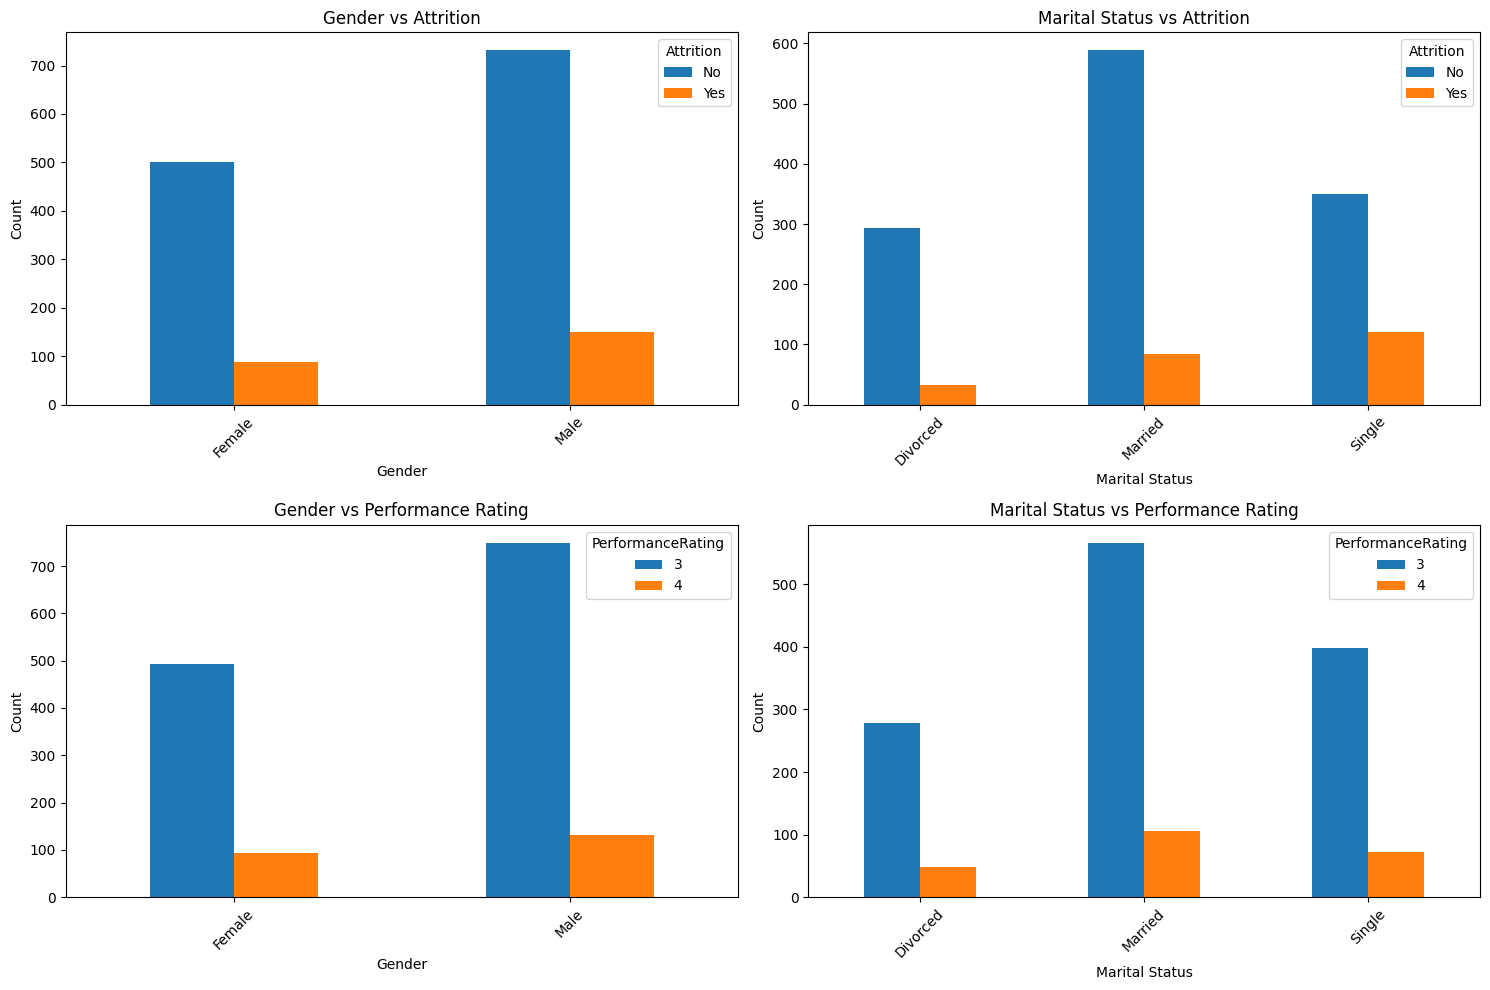

In [8]:
# Step 2.5: Bar charts
plt.figure(figsize=(15, 10))

# Chart 1: Gender vs Attrition
plt.subplot(2, 2, 1)
gender_attrition = pd.crosstab(df['Gender'], df['Attrition'])
gender_attrition.plot(kind='bar', ax=plt.gca())
plt.title('Gender vs Attrition')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Chart 2: MaritalStatus vs Attrition  
plt.subplot(2, 2, 2)
marital_attrition = pd.crosstab(df['MaritalStatus'], df['Attrition'])
marital_attrition.plot(kind='bar', ax=plt.gca())
plt.title('Marital Status vs Attrition')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Chart 3: Gender vs PerformanceRating
plt.subplot(2, 2, 3)
gender_performance = pd.crosstab(df['Gender'], df['PerformanceRating'])
gender_performance.plot(kind='bar', ax=plt.gca())
plt.title('Gender vs Performance Rating')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Chart 4: MaritalStatus vs PerformanceRating
plt.subplot(2, 2, 4)
marital_performance = pd.crosstab(df['MaritalStatus'], df['PerformanceRating'])
marital_performance.plot(kind='bar', ax=plt.gca())
plt.title('Marital Status vs Performance Rating')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('2_5_protected_class_charts.png')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=02ee5cd2-a126-48b8-86aa-f061b7538fe8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>